In [17]:
# ドライブへマウント(一回やれば不要です)
# from google.colab import drive
# drive.mount('/content/drive')

/content/drive/My Drive/darknet


In [0]:
#darknetディレクトリに移動　
cd /content/drive/My \Drive/darknet

In [23]:
# makeコマンド(ここでエラーが生じるかもしれないので、出たら報告してください)
%%bash
make

gcc -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -DCUDNN -shared obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/detection_layer.o obj/route_layer.o obj/upsample_layer.o obj/box.o obj/normalization_layer.o obj/avgpool_layer.o obj/layer.o obj/local_layer.o obj/shortcut_layer.o obj/logistic_layer.o obj/activation_layer.o obj/rnn_layer.o obj/gru_layer.o obj/crnn_layer.o obj/demo.o obj/batchnorm_layer.o obj/region_layer.o obj/reorg_layer.o obj/tree.o obj/lstm_layer.o obj/l2norm_layer.o obj/yolo_layer.o obj/iseg_layer.o obj/image_opencv.o obj/convolutional_kernels.o obj/deconvolutional_kernels.o obj/activation_kernels.o obj/im2col_kernels.o obj/col2im_ker

In [7]:
# trainデータとtestデータに分割 (test.txtとtrain.txtという画像へのパスが列挙されたファイルがdata/imagesに生成されるので、確認してみてください)
! python3 process.py

ok


In [28]:
# 学習を行う
# 実行ログが何を表しているかは、資料をみてください
! ./darknet detector train cfg/obj.data cfg/yolov3-voc.cfg darknet53.conv.74

ストリーミング出力は最後の 5000 行に切り捨てられました。
Region 82 Avg IOU: 0.527108, Class: 0.892889, Obj: 0.754631, No Obj: 0.001412, .5R: 0.500000, .75R: 0.000000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000079, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000032, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.519613, Class: 0.595212, Obj: 0.760683, No Obj: 0.001772, .5R: 0.600000, .75R: 0.000000,  count: 5
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000076, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000032, .5R: -nan, .75R: -nan,  count: 0
649: 0.479141, 0.630893 avg, 0.000177 rate, 1.386239 seconds, 10384 images
Loaded: 0.000053 seconds
Region 82 Avg IOU: 0.522969, Class: 0.976545, Obj: 0.692977, No Obj: 0.001226, .5R: 0.750000, .75R: 0.000000,  count: 4
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000075, .5R: -nan, .75R: -nan,  count: 0
Region

In [42]:
# 学習で得られた重みデータを用いて予測を行う
# 詳細は資料参照で
!./darknet detector test cfg/obj.data cfg/yolov3-voc.cfg backup/yolov3-voc_final.weights data/images/bukkake_1.jpg 

names: Using default 'data/names.list'
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOP

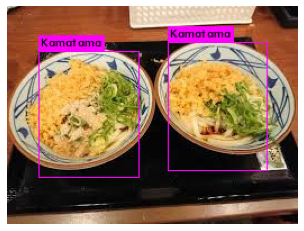

In [41]:
# 予測結果を画像で確認
# このコードは特にいじる必要ないです
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)